# 1. Importing Modules

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 


import seaborn as sns

In [2]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import seaborn as sns

import plotly
import plotly.offline as pyoff
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go

import squarify # for tree maps
%matplotlib inline



# 2. Importing Dataset

In [3]:
churn_cust_data=pd.read_csv(r"telecom_churn_data.csv",header=0)
churn_cust_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


In [4]:
type(churn_cust_data)

pandas.core.frame.DataFrame

In [5]:
churn_cust_data.columns

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [6]:
churn_cust_data.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [7]:
churn_cust_data_col=churn_cust_data.columns.tolist()

In [8]:
churn_cust_data_col

['customerID',
 'tenure',
 'PhoneService',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

In [9]:
churn_cust_data['Churn']

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [10]:
tar_variable=churn_cust_data['Churn']

In [11]:
uni_Id=churn_cust_data['customerID']

In [12]:
tar_variable

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [13]:
churn_cust_data = churn_cust_data.drop('customerID',axis=1)

In [14]:
churn_cust_data.columns

Index(['tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [15]:
churn_cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tenure            7043 non-null   int64  
 1   PhoneService      7043 non-null   object 
 2   Contract          7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7043 non-null   object 
 7   Churn             7043 non-null   object 
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  MultipleLines     7043 non-null   object 
 13  InternetService   7043 non-null   object 
 14  OnlineSecurity    7043 non-null   object 
 15  OnlineBackup      7043 non-null   object 
 16  DeviceProtection  7043 non-null   object 


In [16]:
churn_cust_data= churn_cust_data.replace(r'^\s*$', np.nan, regex=True)

In [17]:
churn_cust_data["TotalCharges"]=churn_cust_data["TotalCharges"].astype("float64")

In [18]:
churn_cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tenure            7043 non-null   int64  
 1   PhoneService      7043 non-null   object 
 2   Contract          7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7032 non-null   float64
 7   Churn             7043 non-null   object 
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  MultipleLines     7043 non-null   object 
 13  InternetService   7043 non-null   object 
 14  OnlineSecurity    7043 non-null   object 
 15  OnlineBackup      7043 non-null   object 
 16  DeviceProtection  7043 non-null   object 


# 3. Dividing data into numerical and categorical columns

In [19]:
# numerical Feautures
churn_cust_data_num=churn_cust_data.select_dtypes(include=['int64','float64'])
churn_chust_data_num_col=churn_cust_data_num.columns.tolist()

In [20]:
churn_cust_data_num.head()

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
0,1,29.85,29.85,0
1,34,56.95,1889.50,0
2,2,53.85,108.15,0
3,45,42.30,1840.75,0
4,2,70.70,151.65,0


In [21]:
#categorical Feautures
churn_cust_data_cat=churn_cust_data.select_dtypes(include=['object'])
churn_chust_data_cat_col=churn_cust_data_cat.columns.tolist()

In [22]:
churn_cust_data_cat

,PhoneService,Contract,PaperlessBilling,PaymentMethod,Churn,gender,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,No,Month-to-month,Yes,Electronic check,No,Female,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,Yes,One year,No,Mailed check,No,Male,No,No,No,DSL,Yes,No,Yes,No,No,No
2,Yes,Month-to-month,Yes,Mailed check,Yes,Male,No,No,No,DSL,Yes,Yes,No,No,No,No
3,No,One year,No,Bank transfer (automatic),No,Male,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,Yes,Month-to-month,Yes,Electronic check,Yes,Female,No,No,No,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Yes,One year,Yes,Mailed check,No,Male,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
7039,Yes,One year,Yes,Credit card (automatic),No,Female,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
7040,No,Month-to-month,Yes,Electronic check,No,Female,Yes,Yes,No phone service,DSL,Yes,No,No,No,No,No
7041,Yes,Month-to-month,Yes,Mailed check,Yes,Male,Yes,No,Yes,Fiber optic,No,No,No,No,No,No


# 4. Identifying and Handling Missing values in Dataset

In [23]:
churn_cust_data.isnull().sum()

tenure               0
PhoneService         0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
dtype: int64

In [24]:
total_data=pd.concat([churn_cust_data_cat,churn_cust_data_num],axis=1)

In [25]:
total_data.head()


,PhoneService,Contract,PaperlessBilling,PaymentMethod,Churn,gender,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
0,No,Month-to-month,Yes,Electronic check,No,Female,Yes,No,No phone service,DSL,No,Yes,No,No,No,No,1,29.85,29.85,0
1,Yes,One year,No,Mailed check,No,Male,No,No,No,DSL,Yes,No,Yes,No,No,No,34,56.95,1889.50,0
2,Yes,Month-to-month,Yes,Mailed check,Yes,Male,No,No,No,DSL,Yes,Yes,No,No,No,No,2,53.85,108.15,0
3,No,One year,No,Bank transfer (automatic),No,Male,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,45,42.30,1840.75,0
4,Yes,Month-to-month,Yes,Electronic check,Yes,Female,No,No,No,Fiber optic,No,No,No,No,No,No,2,70.70,151.65,0


In [26]:
total_data.isna().sum()

PhoneService         0
Contract             0
PaperlessBilling     0
PaymentMethod        0
Churn                0
gender               0
Partner              0
Dependents           0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
tenure               0
MonthlyCharges       0
TotalCharges        11
SeniorCitizen        0
dtype: int64

In [27]:
total_data=total_data.dropna(axis=0)

In [28]:
total_data.isna().sum()

PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Churn               0
gender              0
Partner             0
Dependents          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
tenure              0
MonthlyCharges      0
TotalCharges        0
SeniorCitizen       0
dtype: int64

In [29]:
# numerical Feautures
churn_cust_data_num=total_data.select_dtypes(include=['int64','float64'])
churn_chust_data_num_col=churn_cust_data_num.columns.tolist()


In [30]:
#categorical Feautures
churn_cust_data_cat=total_data.select_dtypes(include=['object'])
churn_chust_data_cat_col=churn_cust_data_cat.columns.tolist()

In [31]:
churn_cust_data_num.head()

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
0,1,29.85,29.85,0
1,34,56.95,1889.50,0
2,2,53.85,108.15,0
3,45,42.30,1840.75,0
4,2,70.70,151.65,0


In [32]:
churn_cust_data_num.nunique()

tenure              72
MonthlyCharges    1584
TotalCharges      6530
SeniorCitizen        2
dtype: int64

In [33]:
churn_cust_data_cat.head()

,PhoneService,Contract,PaperlessBilling,PaymentMethod,Churn,gender,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,No,Month-to-month,Yes,Electronic check,No,Female,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,Yes,One year,No,Mailed check,No,Male,No,No,No,DSL,Yes,No,Yes,No,No,No
2,Yes,Month-to-month,Yes,Mailed check,Yes,Male,No,No,No,DSL,Yes,Yes,No,No,No,No
3,No,One year,No,Bank transfer (automatic),No,Male,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,Yes,Month-to-month,Yes,Electronic check,Yes,Female,No,No,No,Fiber optic,No,No,No,No,No,No


# 5. Identifing No. of unique values in each column

In [34]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


@interact(feature=total_data.columns.to_list())
def describe_features(feature):
    print ("Number of unique values in {} column are {} \n The unique values are {}".format(feature, len(total_data[feature].unique()),total_data[feature].unique()))

    
    

interactive(children=(Dropdown(description='feature', options=('PhoneService', 'Contract', 'PaperlessBilling',…

In [35]:

SeniorCitizen_dict = {1:'yes',
                 0:'no'
           }

In [36]:
 total_data= total_data.replace({"SeniorCitizen":SeniorCitizen_dict})

In [37]:
total_data.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [38]:
# numerical Feautures
churn_cust_data_num=total_data.select_dtypes(include=['int64','float64'])
churn_chust_data_num_col=churn_cust_data_num.columns.tolist()


In [39]:
# numerical Feautures
churn_cust_data_cat=total_data.select_dtypes(include=['object'])
churn_chust_data_cat_col=churn_cust_data_cat.columns.tolist()


In [40]:
churn_cust_data_num.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


In [41]:
churn_cust_data_cat.head()

,PhoneService,Contract,PaperlessBilling,PaymentMethod,Churn,gender,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,SeniorCitizen
0,No,Month-to-month,Yes,Electronic check,No,Female,Yes,No,No phone service,DSL,No,Yes,No,No,No,No,no
1,Yes,One year,No,Mailed check,No,Male,No,No,No,DSL,Yes,No,Yes,No,No,No,no
2,Yes,Month-to-month,Yes,Mailed check,Yes,Male,No,No,No,DSL,Yes,Yes,No,No,No,No,no
3,No,One year,No,Bank transfer (automatic),No,Male,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,no
4,Yes,Month-to-month,Yes,Electronic check,Yes,Female,No,No,No,Fiber optic,No,No,No,No,No,No,no


In [42]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


@interact(feature=total_data.columns.to_list())
def describe_features(feature):
    print ("Number of unique values in {} column are {} \n The unique values are {}".format(feature, len(total_data[feature].unique()),total_data[feature].unique()))

    
    

interactive(children=(Dropdown(description='feature', options=('PhoneService', 'Contract', 'PaperlessBilling',…

In [43]:
churn_cust_data_num.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


# 6. Target Variable Analysis

In [44]:
tar_variable.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [45]:
tar_variable.value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [46]:
temp=tar_variable.value_counts(normalize=True)


In [47]:
import plotly.express as px
import numpy
 
random_x =churn_cust_data["Churn"].value_counts().to_list()
names = ['no', 'yes']
 
fig = px.pie(values=random_x, names=names,title='Churn Distrubution')
fig.show()

In [48]:
trace = go.Bar(x=temp.index,
               y= temp.values,
               text = temp.values,
               textposition = 'inside',
               name = 'churn')
data = [trace]
layout = go.Layout(
    autosize=False,
    width=600,
    height=400,title = "Churn Distribution"
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)
#del temp

# 7. Univariate Analysis on Numerical Attributes

In [49]:
discrete_feature=[feature for feature in churn_cust_data_num if len(churn_cust_data_num[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


In [50]:
continuous_features=[feature for feature in churn_cust_data_num if feature not in discrete_feature+['Churn']]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 3


In [51]:
continuous_features

['tenure', 'MonthlyCharges', 'TotalCharges']


# Continuous Featurees 

Univariate Analysis

In [52]:
data = [go.Histogram(x=churn_cust_data_num.tenure,
       marker=dict(
        color='#0eccbc',# Lava (#CC0E1D)
#         color = 'rgb(200,0,0)'   `
    ))]
layout = go.Layout(title = "Histogram of tenure")
fig = go.Figure(data= data, layout=layout)
iplot(fig)

In [53]:
#most of the customers have been using for shart time

In [54]:
data = [go.Histogram(x=churn_cust_data_num.MonthlyCharges,
       marker=dict(
        color='#0eccbc',# Lava (#CC0E1D)
#         color = 'rgb(200,0,0)'   `
    ))]
layout = go.Layout(title = "Histogram of MonthlyCharges")
fig = go.Figure(data= data, layout=layout)
iplot(fig)

In [55]:
#most of the people are paying monthly charges around the range of 20

In [56]:
data = [go.Histogram(x=churn_cust_data_num.TotalCharges,
       marker=dict(
        color='#0eccbc',# Lava (#CC0E1D)
#         color = 'rgb(200,0,0)'   `
    ))]
layout = go.Layout(title = "Histogram of TotalCharges")
fig = go.Figure(data= data, layout=layout)
iplot(fig)

In [57]:
#most of the customers paying below thousand in an year 

In [58]:
total_data['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [59]:
ls=[]
ls2=[i for i in range(100,9000)]
for i in ls2:
    temp=total_data[(total_data['TotalCharges']<=i) & (total_data['TotalCharges']>=0)]
    temp2=temp['Churn'].value_counts()
    k=temp2.Yes
    ls.append(k)

In [60]:
import plotly.express as px

df=pd.DataFrame(data={'threshold':ls2,'yes_count':ls})
fig = px.line(df, x="threshold", y="yes_count", title='threshold vs yes_count')
fig.show()

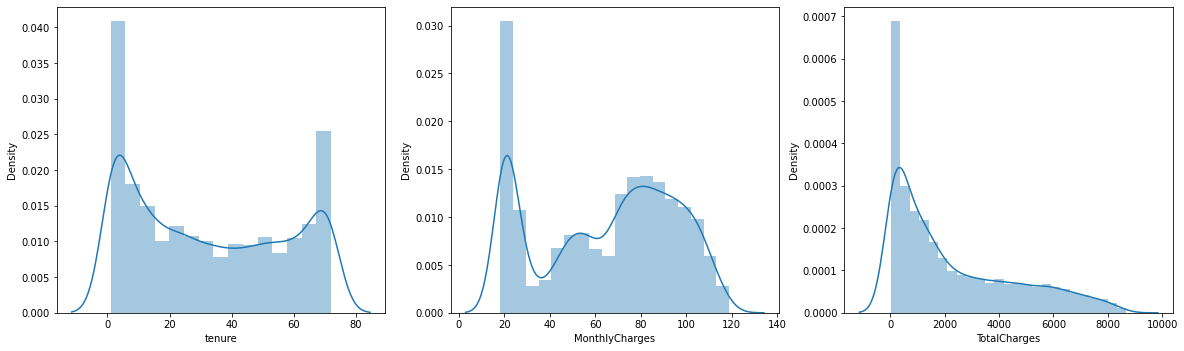

In [61]:
#plot a univariate distribution of continues observations
plt.figure(figsize=(20,80), facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(total_data[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

# 8. Bi-Variate Analysis on Numerical Attributes

In [62]:
trace1 = go.Box(y = total_data.tenure[total_data.Churn=='Yes'],name = 'Yes',
#                 boxpoints = 'all',jitter = 1
               )
# boxpoints is used to specify the points to plot
# jitter is used to specify how far from each should the points be
trace2 = go.Box(y = total_data.tenure[total_data.Churn=='No'],name= 'No',
#                boxpoints = 'all',jitter = 1
               )
data = [trace1,trace2]
layout = go.Layout(width = 800,
                   height = 500,title = 'tenure vs Churn')
fig = go.Figure(data=data,layout = layout)
iplot(fig)

In [63]:
#the most customers who are using the service for the long do not want to switch 

In [64]:
churn_mapping = {"No": 0, "Yes": 1}
total_data['ChurnVal'] = total_data['Churn'].map(churn_mapping)

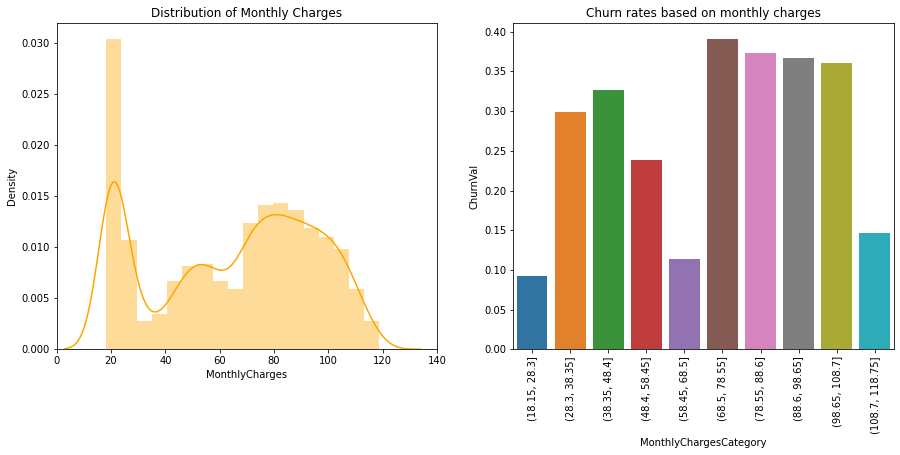

In [65]:
fig, [axes1, axes2] = plt.subplots(1,2,figsize=(15,6))

# Plot MonthlyCharges occurance
sns.distplot(total_data.MonthlyCharges, color='orange', ax=axes1)
axes1.set_title('Distribution of Monthly Charges')
axes1.set_xlim(0,140)

# Categorize MonthlyCharges into bins and plot
total_data['MonthlyChargesCategory'] = pd.cut(total_data["MonthlyCharges"], bins=10)
sns.barplot(x='MonthlyChargesCategory', y='ChurnVal', data=total_data, ci=None, ax=axes2)
[items.set_rotation(90) for items in axes2.get_xticklabels()]
axes2.set_title('Churn rates based on monthly charges')

plt.show()

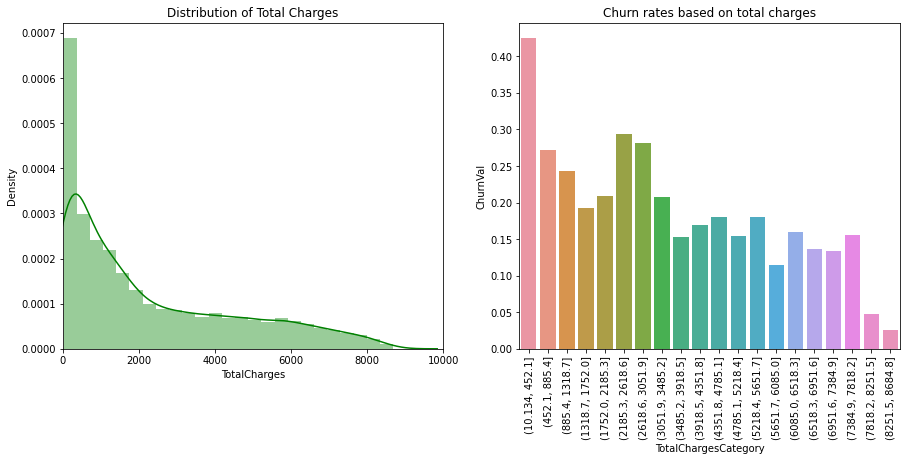

In [66]:
fig, [axes1, axes2] = plt.subplots(1,2,figsize=(15,6))

# Plot TotalCharges occurance
sns.distplot(total_data.TotalCharges, color='green', ax=axes1)
axes1.set_title('Distribution of Total Charges')
axes1.set_xlim(0,10000)

# Categorize TotalCharges into bins and plot
total_data['TotalChargesCategory'] = pd.cut(total_data["TotalCharges"], bins=20)
sns.barplot(x='TotalChargesCategory', y='ChurnVal', data=total_data, ci=None, ax=axes2)
[items.set_rotation(90) for items in axes2.get_xticklabels()]
axes2.set_title('Churn rates based on total charges')

plt.show()

In [67]:
trace1 = go.Box(y = total_data.MonthlyCharges[total_data.Churn=='Yes'],name = 'Yes',
#                 boxpoints = 'all',jitter = 1
               )
# boxpoints is used to specify the points to plot
# jitter is used to specify how far from each should the points be
trace2 = go.Box(y = total_data.MonthlyCharges[total_data.Churn=='No'],name= 'No',
#                boxpoints = 'all',jitter = 1
               )
data = [trace1,trace2]
layout = go.Layout(width = 800,
                   height = 500,title = 'Monthly_cahrges vs Churn')
fig = go.Figure(data=data,layout = layout)
iplot(fig)

In [68]:
#the most of customers who are having more charges would prefer to change the telecom

In [69]:
trace1 = go.Box(y = total_data.TotalCharges[total_data.Churn=='Yes'],name = 'Yes',
#                 boxpoints = 'all',jitter = 1
               )
# boxpoints is used to specify the points to plot
# jitter is used to specify how far from each should the points be
trace2 = go.Box(y = total_data.TotalCharges[total_data.Churn=='No'],name= 'No',
#                boxpoints = 'all',jitter = 1
               )
data = [trace1,trace2]
layout = go.Layout(width = 800,
                   height = 500,title = 'Total Charges vs Churn')
fig = go.Figure(data=data,layout = layout)
iplot(fig)

In [70]:
q1=total_data['TotalCharges'].quantile(0.25)

In [71]:
q3=total_data['TotalCharges'].quantile(0.75)

In [72]:
IQR=q3-q1

In [73]:
# Calculate the Upper bound

Upper_bound = round(q3 + 1.5 * IQR, 3)
Upper_bound

8884.669

In [74]:
Lower_bound = round(q1 - 1.5 * IQR, 3)
Lower_bound

-4688.481

In [75]:
total_data=total_data[(total_data['TotalCharges']>=Lower_bound)&(total_data['TotalCharges']<=Upper_bound)]

In [76]:
trace1 = go.Box(y = total_data.TotalCharges[total_data.Churn=='Yes'],name = 'Yes',
#                 boxpoints = 'all',jitter = 1
               )
# boxpoints is used to specify the points to plot
# jitter is used to specify how far from each should the points be
trace2 = go.Box(y = total_data.TotalCharges[total_data.Churn=='No'],name= 'No',
#                boxpoints = 'all',jitter = 1
               )
data = [trace1,trace2]
layout = go.Layout(width = 800,
                   height = 500,title = 'Total Charges vs Churn')
fig = go.Figure(data=data,layout = layout)
iplot(fig)

In [77]:
#the 

# 9.Explore the Correlation between numerical features

<AxesSubplot: >

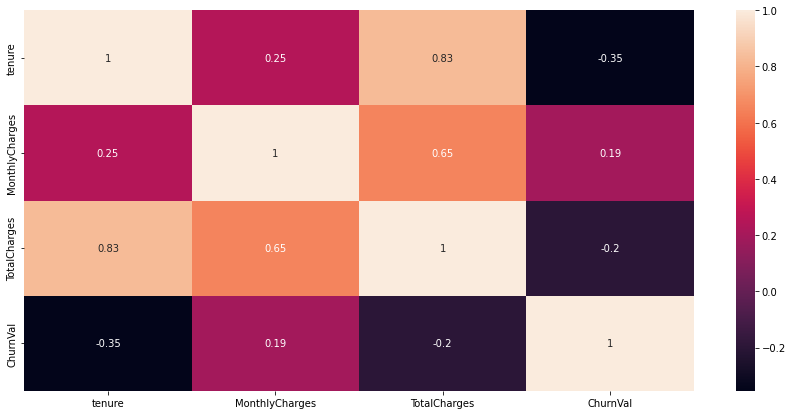

In [78]:
## Checking for correlation
cor_mat=total_data.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

In [79]:
#no two variables are highly corelation

# 10. Univariate Analysis on Categorical Attributes

In [80]:
def generate_layout_bar(col_name):
    layout_bar = go.Layout(
        autosize=False, # auto size the graph? use False if you are specifying the height and width
        width=800, # height of the figure in pixels
        height=600, # height of the figure in pixels
        title = "Distribution of {} column".format(col_name), # title of the figure
        # more granular control on the title font 
        titlefont=dict( 
            family='Courier New, monospace', # font family
            size=14, # size of the font
            color='black' # color of the font
        ),
        # granular control on the axes objects 
        xaxis=dict( 
        tickfont=dict(
            family='Courier New, monospace', # font family
            size=14, # size of ticks displayed on the x axis
            color='black'  # color of the font
            )
        ),
        yaxis=dict(
            title='Percentage',
            titlefont=dict(
                size=14,
                color='black'
            ),
        tickfont=dict(
            family='Courier New, monospace', # font family
            size=14, # size of ticks displayed on the y axis
            color='black' # color of the font
            )
        ),
        font = dict(
            family='Courier New, monospace', # font family
            color = "white",# color of the font
            size = 12 # size of the font displayed on the bar
                )  
        )
    return layout_bar

In [81]:
def plot_bar(col_name):
    # create a table with value counts
    temp = total_data[col_name].value_counts()
    # creating a Bar chart object of plotly
    data = [go.Bar(
            x=temp.index, # x axis values
            y=np.round(temp.values/temp.values.sum(),4)*100, # y axis values
            text = ['{}%'.format(i) for i in np.round(temp.values/temp.values.sum(),4)*100],
        # text to be displayed on the bar, we are doing this to display the '%' symbol along with the number on the bar
            textposition = 'auto', # specify at which position on the bar the text should appear
        marker = dict(color = '#0047AB'),)] # change color of the bar
    # color used here Cobalt Blue
     
    layout_bar = generate_layout_bar(col_name=col_name)

    fig = go.Figure(data=data, layout=layout_bar)
    return iplot(fig)

In [82]:
churn_cust_data_cat.head()

,PhoneService,Contract,PaperlessBilling,PaymentMethod,Churn,gender,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,SeniorCitizen
0,No,Month-to-month,Yes,Electronic check,No,Female,Yes,No,No phone service,DSL,No,Yes,No,No,No,No,no
1,Yes,One year,No,Mailed check,No,Male,No,No,No,DSL,Yes,No,Yes,No,No,No,no
2,Yes,Month-to-month,Yes,Mailed check,Yes,Male,No,No,No,DSL,Yes,Yes,No,No,No,No,no
3,No,One year,No,Bank transfer (automatic),No,Male,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,no
4,Yes,Month-to-month,Yes,Electronic check,Yes,Female,No,No,No,Fiber optic,No,No,No,No,No,No,no


# Uni variate analysis

In [83]:
plot_bar('PhoneService')

In [84]:
#most of the people have landline service along with internet service

In [85]:
plot_bar('Contract')

In [86]:
#most of the coustomer asa choosen month to month plan

In [87]:
plot_bar('PaperlessBilling')

In [88]:
#most of the coustomer have opted to paperless billing

In [89]:
plot_bar('PaymentMethod')

In [90]:
#most of the customers choose to pay bill through electronic check

In [91]:
plot_bar('Churn')

In [92]:
plot_bar('gender')

In [93]:
#this not such gender specific

In [94]:
plot_bar('Partner')

In [95]:
#weather a customer is maried or in relationship does not depend much

In [96]:
plot_bar('Dependents')

In [97]:
#most of the customers do not have dependents like children/retired parents

In [98]:
plot_bar('MultipleLines')

In [99]:
#most of the customer do not have  multiple lines of internet connectivity

In [100]:
plot_bar('InternetService')

In [101]:
#most of the customers are intrested to chose fiber optics as internet service

In [102]:
plot_bar('OnlineSecurity')

In [103]:
#most of the customers do not have online security

In [104]:
plot_bar('OnlineBackup')

In [105]:
#most of the customers do not have online backup

In [106]:
plot_bar('DeviceProtection')

In [107]:
# most of the customers do not have device protection

In [108]:
plot_bar('TechSupport')

In [109]:
#most of the customers did not opted for tech support

In [110]:
plot_bar('StreamingTV')

In [111]:
#the customers do not have an option of TV streaming and have are not much difference 

In [112]:
#less customers have no internet service

In [113]:
plot_bar('StreamingMovies')

In [114]:
#the customers do not have an option of movies streaming and have are not much difference 

In [115]:
#less customers have no internet service

In [116]:
plot_bar('SeniorCitizen')

In [117]:
#most of the customers are not senior citizen5rg6th7yjukio

# 11. Bi-Variate Analysis on Categorical Attributes

Bi-variate analysis

In [118]:
Gender_churn = total_data.groupby(['gender','Churn']).size().reset_index()
Gender_churn.columns = ['gender','Churn','Count']
Gender_churn

,gender,Churn,Count
0,Female,No,2544
1,Female,Yes,939
2,Male,No,2619
3,Male,Yes,930


In [119]:
Gender_churn.columns = ['gender','Churn','Count']

In [120]:
trace1 = go.Bar(x = Gender_churn.gender[Gender_churn.Churn=='Yes'],
               y = Gender_churn.Count[Gender_churn.Churn=='Yes'],
                text = Gender_churn.Count[Gender_churn.Churn=='Yes'],
                textposition = 'auto',
               name = 'Yes')

trace2 = go.Bar(x = Gender_churn.gender[Gender_churn.Churn=='No'],
               y = Gender_churn.Count[Gender_churn.Churn=='No'],
                 text = Gender_churn.Count[Gender_churn.Churn=='No'],
                textposition = 'auto',
               name = 'No')


data = [trace1,trace2]
layout = go.Layout(width = 800,
                   height = 600,title = 'Gender and Churn')
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [121]:
#churn is independent of gender

In [122]:
PhoneService_churn = total_data.groupby(['PhoneService','Churn']).size().reset_index()
PhoneService_churn.columns = ['PhoneService','Churn','Count']
PhoneService_churn

,PhoneService,Churn,Count
0,No,No,510
1,No,Yes,170
2,Yes,No,4653
3,Yes,Yes,1699


In [123]:
trace1 = go.Bar(x = PhoneService_churn.PhoneService[PhoneService_churn.Churn=='Yes'],
               y = PhoneService_churn.Count[PhoneService_churn.Churn=='Yes'],
                text = PhoneService_churn.Count[PhoneService_churn.Churn=='Yes'],
                textposition = 'auto',
               name = 'Yes')

trace2 = go.Bar(x = PhoneService_churn.PhoneService[PhoneService_churn.Churn=='No'],
               y = PhoneService_churn.Count[PhoneService_churn.Churn=='No'],
                 text = PhoneService_churn.Count[PhoneService_churn.Churn=='No'],
                textposition = 'auto',
               name = 'No')


data = [trace1,trace2]
layout = go.Layout(width = 800,
                   height = 600,title = 'PhoneService and Churn')
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [124]:
#the customers using phone services are willing to shift to other telecom service 
#than comparing with who are not using phone service

In [125]:
churn_cust_data_cat.head()

,PhoneService,Contract,PaperlessBilling,PaymentMethod,Churn,gender,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,SeniorCitizen
0,No,Month-to-month,Yes,Electronic check,No,Female,Yes,No,No phone service,DSL,No,Yes,No,No,No,No,no
1,Yes,One year,No,Mailed check,No,Male,No,No,No,DSL,Yes,No,Yes,No,No,No,no
2,Yes,Month-to-month,Yes,Mailed check,Yes,Male,No,No,No,DSL,Yes,Yes,No,No,No,No,no
3,No,One year,No,Bank transfer (automatic),No,Male,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,no
4,Yes,Month-to-month,Yes,Electronic check,Yes,Female,No,No,No,Fiber optic,No,No,No,No,No,No,no


In [126]:
Contract_churn = total_data.groupby(['Contract','Churn']).size().reset_index()
Contract_churn.columns = ['Contract','Churn','Count']
Contract_churn

,Contract,Churn,Count
0,Month-to-month,No,2220
1,Month-to-month,Yes,1655
2,One year,No,1306
3,One year,Yes,166
4,Two year,No,1637
5,Two year,Yes,48


In [127]:
trace1 = go.Bar(x = Contract_churn.Contract[Contract_churn.Churn=='Yes'],
               y = Contract_churn.Count[Contract_churn.Churn=='Yes'],
                text = Contract_churn.Count[Contract_churn.Churn=='Yes'],
                textposition = 'auto',
               name = 'Yes')

trace2 = go.Bar(x = Contract_churn.Contract[Contract_churn.Churn=='No'],
               y = Contract_churn.Count[Contract_churn.Churn=='No'],
                 text = Contract_churn.Count[Contract_churn.Churn=='No'],
                textposition = 'auto',
               name = 'No')


data = [trace1,trace2]
layout = go.Layout(width = 800,
                   height = 600,title = 'Contract and Churn')
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [128]:
#the customers who tale contract for long period are less willing to shift to other service

In [129]:
PaperlessBilling_churn = total_data.groupby(['PaperlessBilling','Churn']).size().reset_index()
PaperlessBilling_churn.columns = ['PaperlessBilling','Churn','Count']
PaperlessBilling_churn

,PaperlessBilling,Churn,Count
0,No,No,2395
1,No,Yes,469
2,Yes,No,2768
3,Yes,Yes,1400


In [130]:
trace1 = go.Bar(x = PaperlessBilling_churn.PaperlessBilling[PaperlessBilling_churn.Churn=='Yes'],
               y = PaperlessBilling_churn.Count[PaperlessBilling_churn.Churn=='Yes'],
                text = PaperlessBilling_churn.Count[PaperlessBilling_churn.Churn=='Yes'],
                textposition = 'auto',
               name = 'Yes')

trace2 = go.Bar(x = PaperlessBilling_churn.PaperlessBilling[PaperlessBilling_churn.Churn=='No'],
               y = PaperlessBilling_churn.Count[PaperlessBilling_churn.Churn=='No'],
                 text = PaperlessBilling_churn.Count[PaperlessBilling_churn.Churn=='No'],
                textposition = 'auto',
               name = 'No')


data = [trace1,trace2]
layout = go.Layout(width = 800,
                   height = 600,title = 'PaperlessBilling and Churn')
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [131]:
#the customers who chose paqperless billing are more willing to shift the company

In [132]:
PaymentMethod_churn = total_data.groupby(['PaymentMethod','Churn']).size().reset_index()
PaymentMethod_churn.columns = ['PaymentMethod','Churn','Count']
PaymentMethod_churn

,PaymentMethod,Churn,Count
0,Bank transfer (automatic),No,1284
1,Bank transfer (automatic),Yes,258
2,Credit card (automatic),No,1289
3,Credit card (automatic),Yes,232
4,Electronic check,No,1294
5,Electronic check,Yes,1071
6,Mailed check,No,1296
7,Mailed check,Yes,308


In [133]:
trace1 = go.Bar(x = PaymentMethod_churn.PaymentMethod[PaymentMethod_churn.Churn=='Yes'],
               y = PaymentMethod_churn.Count[PaymentMethod_churn.Churn=='Yes'],
                text = PaymentMethod_churn.Count[PaymentMethod_churn.Churn=='Yes'],
                textposition = 'auto',
               name = 'Yes')

trace2 = go.Bar(x = PaymentMethod_churn.PaymentMethod[PaymentMethod_churn.Churn=='No'],
               y = PaymentMethod_churn.Count[PaymentMethod_churn.Churn=='No'],
                 text = PaymentMethod_churn.Count[PaymentMethod_churn.Churn=='No'],
                textposition = 'auto',
               name = 'No')


data = [trace1,trace2]
layout = go.Layout(width = 800,
                   height = 600,title = 'PaymentMethod and Churn')
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [134]:
#most customers are willing to use electronic check services but they are not that convinent to the people

In [135]:
Partner_churn = total_data.groupby(['Partner','Churn']).size().reset_index()
Partner_churn.columns = ['Partner','Churn','Count']
Partner_churn

,Partner,Churn,Count
0,No,No,2439
1,No,Yes,1200
2,Yes,No,2724
3,Yes,Yes,669


In [136]:
trace1 = go.Bar(x = Partner_churn.Partner[Partner_churn.Churn=='Yes'],
               y = Partner_churn.Count[Partner_churn.Churn=='Yes'],
                text = Partner_churn.Count[Partner_churn.Churn=='Yes'],
                textposition = 'auto',
               name = 'Yes')

trace2 = go.Bar(x = Partner_churn.Partner[Partner_churn.Churn=='No'],
               y = Partner_churn.Count[Partner_churn.Churn=='No'],
                 text = Partner_churn.Count[Partner_churn.Churn=='No'],
                textposition = 'auto',
               name = 'No')


data = [trace1,trace2]
layout = go.Layout(width = 800,
                   height = 600,title = ' Partner and Churn')
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [137]:
#the most of the customers who don't have aprtner are more willing to shift

In [138]:
Dependents_churn = total_data.groupby(['Dependents','Churn']).size().reset_index()
Dependents_churn.columns = ['Dependents','Churn','Count']
Dependents_churn

,Dependents,Churn,Count
0,No,No,3390
1,No,Yes,1543
2,Yes,No,1773
3,Yes,Yes,326


In [139]:
trace1 = go.Bar(x = Dependents_churn.Dependents[Dependents_churn.Churn=='Yes'],
               y = Dependents_churn.Count[Dependents_churn.Churn=='Yes'],
                text = Dependents_churn.Count[Dependents_churn.Churn=='Yes'],
                textposition = 'auto',
               name = 'Yes')

trace2 = go.Bar(x = Dependents_churn.Dependents[Dependents_churn.Churn=='No'],
               y = Dependents_churn.Count[Dependents_churn.Churn=='No'],
                 text = Dependents_churn.Count[Dependents_churn.Churn=='No'],
                textposition = 'auto',
               name = 'No')


data = [trace1,trace2]
layout = go.Layout(width = 800,
                   height = 600,title = 'Dependents and Churn')
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [140]:
#most of the customer who have dependents ae less willing to shift to the other services

In [141]:
MultipleLines_churn = total_data.groupby(['MultipleLines','Churn']).size().reset_index()
MultipleLines_churn.columns = ['MultipleLines','Churn','Count']
MultipleLines_churn

,MultipleLines,Churn,Count
0,No,No,2536
1,No,Yes,849
2,No phone service,No,510
3,No phone service,Yes,170
4,Yes,No,2117
5,Yes,Yes,850


In [142]:
trace1 = go.Bar(x = MultipleLines_churn.MultipleLines[MultipleLines_churn.Churn=='Yes'],
               y = MultipleLines_churn.Count[MultipleLines_churn.Churn=='Yes'],
                text = MultipleLines_churn.Count[MultipleLines_churn.Churn=='Yes'],
                textposition = 'auto',
               name = 'Yes')

trace2 = go.Bar(x = MultipleLines_churn.MultipleLines[MultipleLines_churn.Churn=='No'],
               y = MultipleLines_churn.Count[MultipleLines_churn.Churn=='No'],
                 text = MultipleLines_churn.Count[MultipleLines_churn.Churn=='No'],
                textposition = 'auto',
               name = 'No')


data = [trace1,trace2]
layout = go.Layout(width = 800,
                   height = 600,title = 'MultipleLines and Churn')
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [143]:
#both the customers having multiple lines and not have multiple lines service are equally praportion to leave the company

In [144]:
InternetService_churn = total_data.groupby(['InternetService','Churn']).size().reset_index()
InternetService_churn.columns = ['InternetService','Churn','Count']
InternetService_churn

,InternetService,Churn,Count
0,DSL,No,1957
1,DSL,Yes,459
2,Fiber optic,No,1799
3,Fiber optic,Yes,1297
4,No,No,1407
5,No,Yes,113


In [145]:
trace1 = go.Bar(x = InternetService_churn.InternetService[InternetService_churn.Churn=='Yes'],
               y = InternetService_churn.Count[InternetService_churn.Churn=='Yes'],
                text = InternetService_churn.Count[InternetService_churn.Churn=='Yes'],
                textposition = 'auto',
               name = 'Yes')

trace2 = go.Bar(x =InternetService_churn.InternetService[InternetService_churn.Churn=='No'],
               y = InternetService_churn.Count[InternetService_churn.Churn=='No'],
                 text = InternetService_churn.Count[InternetService_churn.Churn=='No'],
                textposition = 'auto',
               name = 'No')


data = [trace1,trace2]
layout = go.Layout(width = 800,
                   height = 600,title = 'InternetService and Churn')
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [146]:
#the most of the customer who are using fiber optics service rae mostly willing to change the service

In [147]:
OnlineSecurity_churn = total_data.groupby(['OnlineSecurity','Churn']).size().reset_index()
OnlineSecurity_churn.columns = ['OnlineSecurity','Churn','Count']
OnlineSecurity_churn

,OnlineSecurity,Churn,Count
0,No,No,2036
1,No,Yes,1461
2,No internet service,No,1407
3,No internet service,Yes,113
4,Yes,No,1720
5,Yes,Yes,295


In [148]:
trace1 = go.Bar(x = OnlineSecurity_churn.OnlineSecurity[OnlineSecurity_churn.Churn=='Yes'],
               y = OnlineSecurity_churn.Count[OnlineSecurity_churn.Churn=='Yes'],
                text = OnlineSecurity_churn.Count[OnlineSecurity_churn.Churn=='Yes'],
                textposition = 'auto',
               name = 'Yes')

trace2 = go.Bar(x =OnlineSecurity_churn.OnlineSecurity[OnlineSecurity_churn.Churn=='No'],
               y = OnlineSecurity_churn.Count[OnlineSecurity_churn.Churn=='No'],
                 text = OnlineSecurity_churn.Count[OnlineSecurity_churn.Churn=='No'],
                textposition = 'auto',
               name = 'No')


data = [trace1,trace2]
layout = go.Layout(width = 800,
                   height = 600,title = 'OnlineSecurity and Churn')
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [149]:
#the most of the customers who are having not having online security are willing to shift the company

In [150]:
OnlineBackup_churn = total_data.groupby(['OnlineBackup','Churn']).size().reset_index()
OnlineBackup_churn.columns = ['OnlineBackup','Churn','Count']
OnlineBackup_churn

,OnlineBackup,Churn,Count
0,No,No,1854
1,No,Yes,1233
2,No internet service,No,1407
3,No internet service,Yes,113
4,Yes,No,1902
5,Yes,Yes,523


In [151]:
trace1 = go.Bar(x = OnlineBackup_churn.OnlineBackup[OnlineBackup_churn.Churn=='Yes'],
               y = OnlineBackup_churn.Count[OnlineBackup_churn.Churn=='Yes'],
                text = OnlineBackup_churn.Count[OnlineBackup_churn.Churn=='Yes'],
                textposition = 'auto',
               name = 'Yes')

trace2 = go.Bar(x =OnlineBackup_churn.OnlineBackup[OnlineBackup_churn.Churn=='No'],
               y = OnlineBackup_churn.Count[OnlineBackup_churn.Churn=='No'],
                 text = OnlineBackup_churn.Count[OnlineBackup_churn.Churn=='No'],
                textposition = 'auto',
               name = 'No')


data = [trace1,trace2]
layout = go.Layout(width = 800,
                   height = 600,title = 'OnlineBackup and Churn')
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [152]:
##the most of the customers who are having not having online backup are willing to shift the company

In [153]:
DeviceProtection_churn = total_data.groupby(['DeviceProtection','Churn']).size().reset_index()
DeviceProtection_churn.columns = ['DeviceProtection','Churn','Count']
DeviceProtection_churn

,DeviceProtection,Churn,Count
0,No,No,1883
1,No,Yes,1211
2,No internet service,No,1407
3,No internet service,Yes,113
4,Yes,No,1873
5,Yes,Yes,545


In [154]:
trace1 = go.Bar(x = DeviceProtection_churn.DeviceProtection[DeviceProtection_churn.Churn=='Yes'],
               y = DeviceProtection_churn.Count[DeviceProtection_churn.Churn=='Yes'],
                text = DeviceProtection_churn.Count[DeviceProtection_churn.Churn=='Yes'],
                textposition = 'auto',
               name = 'Yes')

trace2 = go.Bar(x =DeviceProtection_churn.DeviceProtection[DeviceProtection_churn.Churn=='No'],
               y = DeviceProtection_churn.Count[DeviceProtection_churn.Churn=='No'],
                 text = DeviceProtection_churn.Count[DeviceProtection_churn.Churn=='No'],
                textposition = 'auto',
               name = 'No')


data = [trace1,trace2]
layout = go.Layout(width = 800,
                   height = 600,title = 'DeviceProtection and Churn')
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [155]:
#the most of the customers who are having not having device protection are willing to shift the company

In [156]:
TechSupport_churn = total_data.groupby(['TechSupport','Churn']).size().reset_index()
TechSupport_churn.columns = ['TechSupport','Churn','Count']
TechSupport_churn

,TechSupport,Churn,Count
0,No,No,2026
1,No,Yes,1446
2,No internet service,No,1407
3,No internet service,Yes,113
4,Yes,No,1730
5,Yes,Yes,310


In [157]:
trace1 = go.Bar(x = TechSupport_churn.TechSupport[TechSupport_churn.Churn=='Yes'],
               y = TechSupport_churn.Count[TechSupport_churn.Churn=='Yes'],
                text = TechSupport_churn.Count[TechSupport_churn.Churn=='Yes'],
                textposition = 'auto',
               name = 'Yes')

trace2 = go.Bar(x =TechSupport_churn.TechSupport[TechSupport_churn.Churn=='No'],
               y = TechSupport_churn.Count[TechSupport_churn.Churn=='No'],
                 text = TechSupport_churn.Count[TechSupport_churn.Churn=='No'],
                textposition = 'auto',
               name = 'No')


data = [trace1,trace2]
layout = go.Layout(width = 800,
                   height = 600,title = 'TechSupport and Churn')
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [158]:
#the most of the customers who are having not having tech support are willing to shift the company

In [159]:
StreamingTV_churn = total_data.groupby(['StreamingTV','Churn']).size().reset_index()
StreamingTV_churn.columns = ['StreamingTV','Churn','Count']
StreamingTV_churn

,StreamingTV,Churn,Count
0,No,No,1867
1,No,Yes,942
2,No internet service,No,1407
3,No internet service,Yes,113
4,Yes,No,1889
5,Yes,Yes,814


In [160]:
trace1 = go.Bar(x = StreamingTV_churn.StreamingTV[StreamingTV_churn.Churn=='Yes'],
               y = StreamingTV_churn.Count[StreamingTV_churn.Churn=='Yes'],
                text = StreamingTV_churn.Count[StreamingTV_churn.Churn=='Yes'],
                textposition = 'auto',
               name = 'Yes')

trace2 = go.Bar(x =StreamingTV_churn.StreamingTV[StreamingTV_churn.Churn=='No'],
               y = StreamingTV_churn.Count[StreamingTV_churn.Churn=='No'],
                 text = StreamingTV_churn.Count[StreamingTV_churn.Churn=='No'],
                textposition = 'auto',
               name = 'No')


data = [trace1,trace2]
layout = go.Layout(width = 800,
                   height = 600,title = 'StreamingTV and Churn')
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [161]:
#the customers  both who are using not using streaming tv have equal praportion

In [162]:
StreamingMovies_churn = total_data.groupby(['StreamingMovies','Churn']).size().reset_index()
StreamingMovies_churn.columns = ['StreamingMovies','Churn','Count']
StreamingMovies_churn

,StreamingMovies,Churn,Count
0,No,No,1843
1,No,Yes,938
2,No internet service,No,1407
3,No internet service,Yes,113
4,Yes,No,1913
5,Yes,Yes,818


In [163]:
trace1 = go.Bar(x = StreamingMovies_churn.StreamingMovies[StreamingMovies_churn.Churn=='Yes'],
               y = StreamingMovies_churn.Count[StreamingMovies_churn.Churn=='Yes'],
                text = StreamingMovies_churn.Count[StreamingMovies_churn.Churn=='Yes'],
                textposition = 'auto',
               name = 'Yes')

trace2 = go.Bar(x =StreamingMovies_churn.StreamingMovies[StreamingMovies_churn.Churn=='No'],
               y = StreamingMovies_churn.Count[StreamingMovies_churn.Churn=='No'],
                 text = StreamingMovies_churn.Count[StreamingMovies_churn.Churn=='No'],
                textposition = 'auto',
               name = 'No')


data = [trace1,trace2]
layout = go.Layout(width = 800,
                   height = 600,title = 'StreamingMovies and Churn')
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [164]:
#the customers  both who are using not using streaming movies have equal praportion

In [165]:
SeniorCitizen_churn = total_data.groupby(['SeniorCitizen','Churn']).size().reset_index()
SeniorCitizen_churn.columns = ['SeniorCitizen','Churn','Count']
SeniorCitizen_churn

,SeniorCitizen,Churn,Count
0,no,No,4497
1,no,Yes,1393
2,yes,No,666
3,yes,Yes,476


In [166]:
trace1 = go.Bar(x = SeniorCitizen_churn.SeniorCitizen[SeniorCitizen_churn.Churn=='Yes'],
               y = SeniorCitizen_churn.Count[SeniorCitizen_churn.Churn=='Yes'],
                text = SeniorCitizen_churn.Count[SeniorCitizen_churn.Churn=='Yes'],
                textposition = 'auto',
               name = 'Yes')

trace2 = go.Bar(x =SeniorCitizen_churn.SeniorCitizen[SeniorCitizen_churn.Churn=='No'],
               y = SeniorCitizen_churn.Count[SeniorCitizen_churn.Churn=='No'],
                 text = SeniorCitizen_churn.Count[SeniorCitizen_churn.Churn=='No'],
                textposition = 'auto',
               name = 'No')


data = [trace1,trace2]
layout = go.Layout(width = 800,
                   height = 600,title = 'SeniorCitizen and Churn')
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [167]:
#the most of the customer who are not senior citizen are willing to change the service

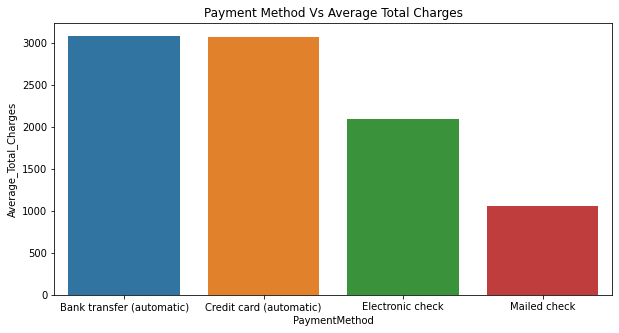

In [168]:

data1=total_data.groupby(['PaymentMethod'],as_index=False)['TotalCharges'].mean()
plt.figure(figsize=(10,5))
sns.barplot(x=data1['PaymentMethod'],y=data1['TotalCharges'])
plt.ylabel('Average_Total_Charges')
plt.title('Payment Method Vs Average Total Charges')
plt.show()

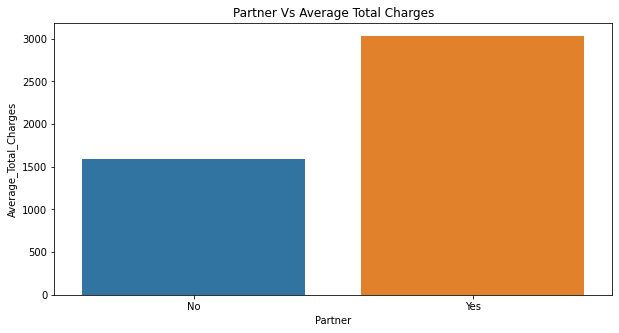

In [169]:
data1=total_data.groupby(['Partner'],as_index=False)['TotalCharges'].mean()
plt.figure(figsize=(10,5))
sns.barplot(x=data1['Partner'],y=data1['TotalCharges'])
plt.ylabel('Average_Total_Charges')
plt.title('Partner Vs Average Total Charges')
plt.show()

In [170]:
st= '''
c_dp = total_data.groupby(['Contract','DeviceProtection']).size().reset_index()
c_dp.columns = ['Contract','DeviceProtection','Count']
c_dp['percent']=round((c_dp['Count']/len(total_data))*100,2)
c_dp

trace1 = go.Bar(x = c_dp.Contract[c_dp.DeviceProtection=='No'],
               y = c_dp.Count[c_dp.DeviceProtection=='No'],
                text = c_dp.percent[c_dp.DeviceProtection=='No'],
                textposition = 'auto',
               name = 'No')

trace2 = go.Bar(x = c_dp.Contract[c_dp.DeviceProtection=='No internet service'],
               y = c_dp.Count[c_dp.DeviceProtection=='No internet service'],
                 text = c_dp.percent[c_dp.DeviceProtection=='No internet service'],
                textposition = 'auto',
               name = 'No internet service')

trace3 = go.Bar(x = c_dp.Contract[c_dp.DeviceProtection=='Yes'],
               y = c_dp.Count[c_dp.DeviceProtection=='Yes'],
                 text = c_dp.percent[c_dp.DeviceProtection=='Yes'],
                textposition = 'auto',
               name = 'Yes')

data = [trace1,trace2,trace3]
layout = go.Layout(width = 800,
                   height = 600,title = 'Contract and DeviceProtection')
fig = go.Figure(data=data, layout=layout)
iplot(fig)'''

l1 = ['c_ob','c_os','c_sm','c_stv','c_ts']
l2 = ['OnlineBackup','OnlineSecurity','StreamingMovies','StreamingTV','TechSupport']
for i,j in zip(l1,l2):
    print(i,j)
    x = st.replace('c_dp',i)
    x = x.replace('DeviceProtection',j)
    print(x)
    print("-"*15)
    print("-"*15)


c_ob OnlineBackup

c_ob = total_data.groupby(['Contract','OnlineBackup']).size().reset_index()
c_ob.columns = ['Contract','OnlineBackup','Count']
c_ob['percent']=round((c_ob['Count']/len(total_data))*100,2)
c_ob

trace1 = go.Bar(x = c_ob.Contract[c_ob.OnlineBackup=='No'],
               y = c_ob.Count[c_ob.OnlineBackup=='No'],
                text = c_ob.percent[c_ob.OnlineBackup=='No'],
                textposition = 'auto',
               name = 'No')

trace2 = go.Bar(x = c_ob.Contract[c_ob.OnlineBackup=='No internet service'],
               y = c_ob.Count[c_ob.OnlineBackup=='No internet service'],
                 text = c_ob.percent[c_ob.OnlineBackup=='No internet service'],
                textposition = 'auto',
               name = 'No internet service')

trace3 = go.Bar(x = c_ob.Contract[c_ob.OnlineBackup=='Yes'],
               y = c_ob.Count[c_ob.OnlineBackup=='Yes'],
                 text = c_ob.percent[c_ob.OnlineBackup=='Yes'],
                textposition = 'auto',
     

In [171]:
c_dp = total_data.groupby(['Contract','DeviceProtection']).size().reset_index()
c_dp.columns = ['Contract','DeviceProtection','Count']
c_dp['percent']=round((c_dp['Count']/len(total_data))*100,2)
c_dp

,Contract,DeviceProtection,Count,percent
0,Month-to-month,No,2394,34.04
1,Month-to-month,No internet service,524,7.45
2,Month-to-month,Yes,957,13.61
3,One year,No,463,6.58
4,One year,No internet service,363,5.16
5,One year,Yes,646,9.19
6,Two year,No,237,3.37
7,Two year,No internet service,633,9.00
8,Two year,Yes,815,11.59


In [172]:
trace1 = go.Bar(x = c_dp.Contract[c_dp.DeviceProtection=='No'],
               y = c_dp.Count[c_dp.DeviceProtection=='No'],
                text = c_dp.percent[c_dp.DeviceProtection=='No'],
                textposition = 'auto',
               name = 'No')

trace2 = go.Bar(x = c_dp.Contract[c_dp.DeviceProtection=='No internet service'],
               y = c_dp.Count[c_dp.DeviceProtection=='No internet service'],
                 text = c_dp.percent[c_dp.DeviceProtection=='No internet service'],
                textposition = 'auto',
               name = 'No internet service')

trace3 = go.Bar(x = c_dp.Contract[c_dp.DeviceProtection=='Yes'],
               y = c_dp.Count[c_dp.DeviceProtection=='Yes'],
                 text = c_dp.percent[c_dp.DeviceProtection=='Yes'],
                textposition = 'auto',
               name = 'Yes')

data = [trace1,trace2,trace3]
layout = go.Layout(width = 800,
                   height = 600,title = 'Contract and DeviceProtection')
fig1 = go.Figure(data=data, layout=layout)
iplot(fig1)

In [173]:
c_ob = total_data.groupby(['Contract','OnlineBackup']).size().reset_index()
c_ob.columns = ['Contract','OnlineBackup','Count']
c_ob['percent']=round((c_ob['Count']/len(total_data))*100,2)
c_ob

,Contract,OnlineBackup,Count,percent
0,Month-to-month,No,2288,32.54
1,Month-to-month,No internet service,524,7.45
2,Month-to-month,Yes,1063,15.12
3,One year,No,487,6.93
4,One year,No internet service,363,5.16
5,One year,Yes,622,8.85
6,Two year,No,312,4.44
7,Two year,No internet service,633,9.00
8,Two year,Yes,740,10.52


In [174]:
trace1 = go.Bar(x = c_ob.Contract[c_ob.OnlineBackup=='No'],
               y = c_ob.Count[c_ob.OnlineBackup=='No'],
                text = c_ob.percent[c_ob.OnlineBackup=='No'],
                textposition = 'auto',
               name = 'No')

trace2 = go.Bar(x = c_ob.Contract[c_ob.OnlineBackup=='No internet service'],
               y = c_ob.Count[c_ob.OnlineBackup=='No internet service'],
                 text = c_ob.percent[c_ob.OnlineBackup=='No internet service'],
                textposition = 'auto',
               name = 'No internet service')

trace3 = go.Bar(x = c_ob.Contract[c_ob.OnlineBackup=='Yes'],
               y = c_ob.Count[c_ob.OnlineBackup=='Yes'],
                 text = c_ob.percent[c_ob.OnlineBackup=='Yes'],
                textposition = 'auto',
               name = 'Yes')

data = [trace1,trace2,trace3]
layout = go.Layout(width = 800,
                   height = 600,title = 'Contract and OnlineBackup')
fig2 = go.Figure(data=data, layout=layout)
iplot(fig2)

In [175]:
c_os = total_data.groupby(['Contract','OnlineSecurity']).size().reset_index()
c_os.columns = ['Contract','OnlineSecurity','Count']
c_os['percent']=round((c_os['Count']/len(total_data))*100,2)
c_os


,Contract,OnlineSecurity,Count,percent
0,Month-to-month,No,2631,37.41
1,Month-to-month,No internet service,524,7.45
2,Month-to-month,Yes,720,10.24
3,One year,No,557,7.92
4,One year,No internet service,363,5.16
5,One year,Yes,552,7.85
6,Two year,No,309,4.39
7,Two year,No internet service,633,9.00
8,Two year,Yes,743,10.57


In [176]:
trace1 = go.Bar(x = c_os.Contract[c_os.OnlineSecurity=='No'],
               y = c_os.Count[c_os.OnlineSecurity=='No'],
                text = c_os.percent[c_os.OnlineSecurity=='No'],
                textposition = 'auto',
               name = 'No')

trace2 = go.Bar(x = c_os.Contract[c_os.OnlineSecurity=='No internet service'],
               y = c_os.Count[c_os.OnlineSecurity=='No internet service'],
                 text = c_os.percent[c_os.OnlineSecurity=='No internet service'],
                textposition = 'auto',
               name = 'No internet service')

trace3 = go.Bar(x = c_os.Contract[c_os.OnlineSecurity=='Yes'],
               y = c_os.Count[c_os.OnlineSecurity=='Yes'],
                 text = c_os.percent[c_os.OnlineSecurity=='Yes'],
                textposition = 'auto',
               name = 'Yes')

data = [trace1,trace2,trace3]
layout = go.Layout(width = 800,
                   height = 600,title = 'Contract and OnlineSecurity')
fig3 = go.Figure(data=data, layout=layout)
iplot(fig3)

In [177]:
c_sm = total_data.groupby(['Contract','StreamingMovies']).size().reset_index()
c_sm.columns = ['Contract','StreamingMovies','Count']
c_sm['percent']=round((c_sm['Count']/len(total_data))*100,2)
c_sm

,Contract,StreamingMovies,Count,percent
0,Month-to-month,No,2047,29.11
1,Month-to-month,No internet service,524,7.45
2,Month-to-month,Yes,1304,18.54
3,One year,No,447,6.36
4,One year,No internet service,363,5.16
5,One year,Yes,662,9.41
6,Two year,No,287,4.08
7,Two year,No internet service,633,9.00
8,Two year,Yes,765,10.88


In [178]:
trace1 = go.Bar(x = c_sm.Contract[c_sm.StreamingMovies=='No'],
               y = c_sm.Count[c_sm.StreamingMovies=='No'],
                text = c_sm.percent[c_sm.StreamingMovies=='No'],
                textposition = 'auto',
               name = 'No')

trace2 = go.Bar(x = c_sm.Contract[c_sm.StreamingMovies=='No internet service'],
               y = c_sm.Count[c_sm.StreamingMovies=='No internet service'],
                 text = c_sm.percent[c_sm.StreamingMovies=='No internet service'],
                textposition = 'auto',
               name = 'No internet service')

trace3 = go.Bar(x = c_sm.Contract[c_sm.StreamingMovies=='Yes'],
               y = c_sm.Count[c_sm.StreamingMovies=='Yes'],
                 text = c_sm.percent[c_sm.StreamingMovies=='Yes'],
                textposition = 'auto',
               name = 'Yes')

data = [trace1,trace2,trace3]
layout = go.Layout(width = 800,
                   height = 600,title = 'Contract and StreamingMovies')
fig4 = go.Figure(data=data, layout=layout)
iplot(fig4)

In [179]:
c_stv = total_data.groupby(['Contract','StreamingTV']).size().reset_index()
c_stv.columns = ['Contract','StreamingTV','Count']
c_stv['percent']=round((c_stv['Count']/len(total_data))*100,2)
c_stv

,Contract,StreamingTV,Count,percent
0,Month-to-month,No,2053,29.20
1,Month-to-month,No internet service,524,7.45
2,Month-to-month,Yes,1298,18.46
3,One year,No,457,6.50
4,One year,No internet service,363,5.16
5,One year,Yes,652,9.27
6,Two year,No,299,4.25
7,Two year,No internet service,633,9.00
8,Two year,Yes,753,10.71


In [180]:
trace1 = go.Bar(x = c_stv.Contract[c_stv.StreamingTV=='No'],
               y = c_stv.Count[c_stv.StreamingTV=='No'],
                text = c_stv.percent[c_stv.StreamingTV=='No'],
                textposition = 'auto',
               name = 'No')

trace2 = go.Bar(x = c_stv.Contract[c_stv.StreamingTV=='No internet service'],
               y = c_stv.Count[c_stv.StreamingTV=='No internet service'],
                 text = c_stv.percent[c_stv.StreamingTV=='No internet service'],
                textposition = 'auto',
               name = 'No internet service')

trace3 = go.Bar(x = c_stv.Contract[c_stv.StreamingTV=='Yes'],
               y = c_stv.Count[c_stv.StreamingTV=='Yes'],
                 text = c_stv.percent[c_stv.StreamingTV=='Yes'],
                textposition = 'auto',
               name = 'Yes')

data = [trace1,trace2,trace3]
layout = go.Layout(width = 800,
                   height = 600,title = 'Contract and StreamingTV')
fig5 = go.Figure(data=data, layout=layout)
iplot(fig5)

In [181]:
c_ts = total_data.groupby(['Contract','TechSupport']).size().reset_index()
c_ts.columns = ['Contract','TechSupport','Count']
c_ts['percent']=round((c_ts['Count']/len(total_data))*100,2)
c_ts

,Contract,TechSupport,Count,percent
0,Month-to-month,No,2680,38.11
1,Month-to-month,No internet service,524,7.45
2,Month-to-month,Yes,671,9.54
3,One year,No,557,7.92
4,One year,No internet service,363,5.16
5,One year,Yes,552,7.85
6,Two year,No,235,3.34
7,Two year,No internet service,633,9.00
8,Two year,Yes,817,11.62


In [182]:
trace1 = go.Bar(x = c_ts.Contract[c_ts.TechSupport=='No'],
               y = c_ts.Count[c_ts.TechSupport=='No'],
                text = c_ts.percent[c_ts.TechSupport=='No'],
                textposition = 'auto',
               name = 'No')

trace2 = go.Bar(x = c_ts.Contract[c_ts.TechSupport=='No internet service'],
               y = c_ts.Count[c_ts.TechSupport=='No internet service'],
                 text = c_ts.percent[c_ts.TechSupport=='No internet service'],
                textposition = 'auto',
               name = 'No internet service')

trace3 = go.Bar(x = c_ts.Contract[c_ts.TechSupport=='Yes'],
               y = c_ts.Count[c_ts.TechSupport=='Yes'],
                 text = c_ts.percent[c_ts.TechSupport=='Yes'],
                textposition = 'auto',
               name = 'Yes')

data = [trace1,trace2,trace3]
layout = go.Layout(width = 800,
                   height = 600,title = 'Contract and TechSupport')
fig6 = go.Figure(data=data, layout=layout)
iplot(fig6)

In [183]:
for fig in [fig1,fig2,fig3,fig4,fig5,fig6]:
    iplot(fig)

In [184]:
churn_cust_data_cat.head()

,PhoneService,Contract,PaperlessBilling,PaymentMethod,Churn,gender,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,SeniorCitizen
0,No,Month-to-month,Yes,Electronic check,No,Female,Yes,No,No phone service,DSL,No,Yes,No,No,No,No,no
1,Yes,One year,No,Mailed check,No,Male,No,No,No,DSL,Yes,No,Yes,No,No,No,no
2,Yes,Month-to-month,Yes,Mailed check,Yes,Male,No,No,No,DSL,Yes,Yes,No,No,No,No,no
3,No,One year,No,Bank transfer (automatic),No,Male,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,no
4,Yes,Month-to-month,Yes,Electronic check,Yes,Female,No,No,No,Fiber optic,No,No,No,No,No,No,no


In [185]:

from sklearn.preprocessing import LabelBinarizer
le=LabelBinarizer()
for i in churn_chust_data_cat_col:
    churn_cust_data_cat[i]=le.fit_transform(churn_cust_data_cat[i])

ModuleNotFoundError: No module named 'sklearn'

<AxesSubplot:>

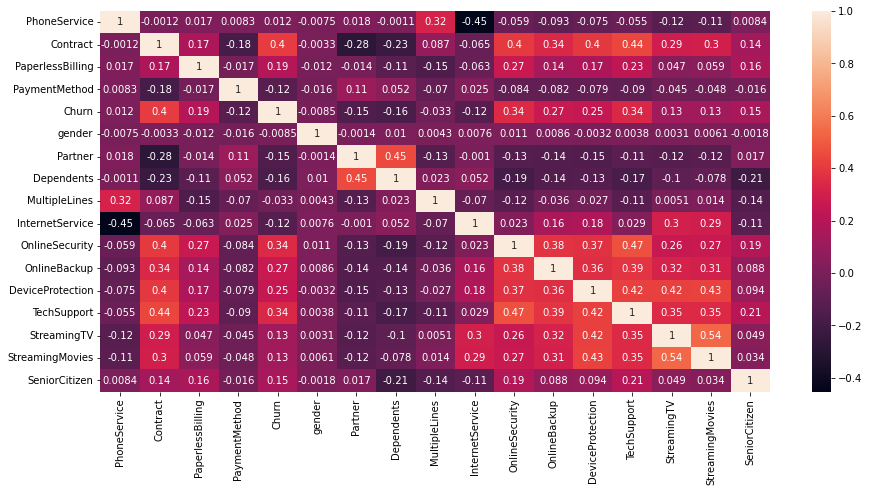

In [ ]:
## Checking for correlation
cor_mat=churn_cust_data_cat.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)